# Shopping Trend Analysis

## Install Libraries

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import mysql.connector as connection
import pandas as pd
import numpy as np

## Create a Database Connection

In [3]:
try:
    mydb = connection.connect(host="localhost",
                             user = "devuser",
                             password = "test1234",
                             database= "customer_marketing")
    query = "SELECT *  FROM cust_marketing_campaign;"
    df_customer = pd.read_sql(query,mydb)
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

## Check Data

In [4]:
df_customer.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   int64 
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

## Data Analysis

### Change Data Type to Category

In [6]:
df_customer["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [7]:
df_customer["Education"] = df_customer["Education"].astype('category')

In [8]:
df_customer["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
df_customer["Marital_Status"] = df_customer["Marital_Status"].astype('category')

### Change Column to Date

In [10]:
df_customer["Dt_Customer"].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '31-05-2013', '22-11-2013', '22-05-2014', '11-05-2013',
       '29-10-2012', '20-02-2013', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '02-10-2013', '28-06-2014', '09-11-2012',
       '24-05-2013', '08-11-2012', '12-05-2014', '11-08-2012',
       '07-06-2014', '12-06-2013', '19-11-2012', '02-04-2013',
       '28-04-2014', '03-03-2014', '04-07-2013', '07-09-2012',
       '18-02-2013', '11-06-2013', '06-12-2013', '21-05-2013',
       '11-05-2014', '19-03-2014', '27-09-2013', '08-04-2013',
       '11-09-2012', '17-03-2013', '05-04-2013', '30-04

In [11]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"])

In [12]:
df_customer.dtypes

ID                              int64
Year_Birth                      int64
Education                    category
Marital_Status               category
Income                          int64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

### Check for Missing Data

In [13]:
df_customer.isnull().values.any()

False

# Data Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## Year of Birth

In [15]:
sorted(df_customer['Year_Birth'].unique())

[1893,
 1899,
 1900,
 1940,
 1941,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996]

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

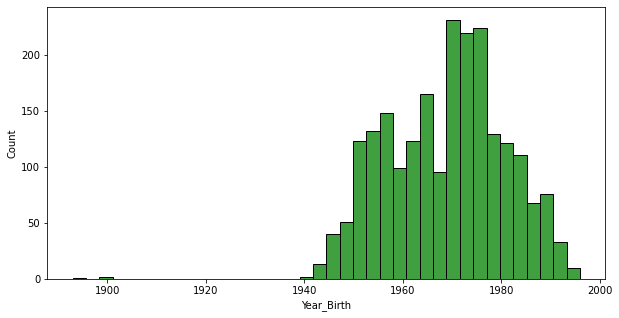

In [16]:
fig = plt.figure(figsize = (10,5))
sns.histplot(x= df_customer.Year_Birth, color = 'green')

## Education

<AxesSubplot:xlabel='Education'>

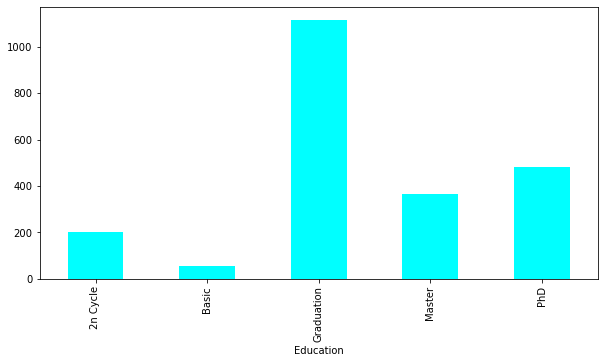

In [17]:
df_customer.groupby("Education")['ID'].count().plot(kind = 'bar', figsize = (10,5), color = 'aqua')

## Marital Status

<AxesSubplot:xlabel='Marital_Status'>

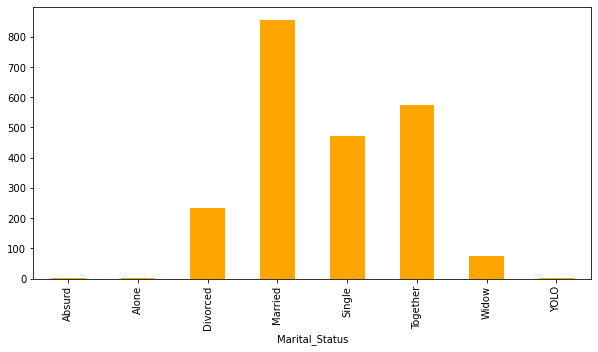

In [18]:
df_customer.groupby("Marital_Status")['ID'].count().plot(kind = 'bar', figsize = (10,5), color = 'orange')

## Income

/Users/oindrilasen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

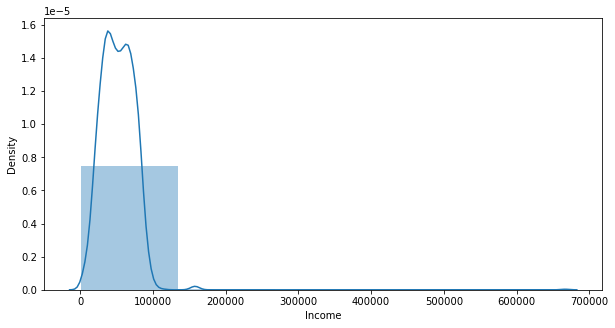

In [19]:
fig = plt.figure(figsize = (10,5))
sns.distplot(df_customer.Income, bins = 5)

## Kids at Home

<AxesSubplot:xlabel='Kidhome'>

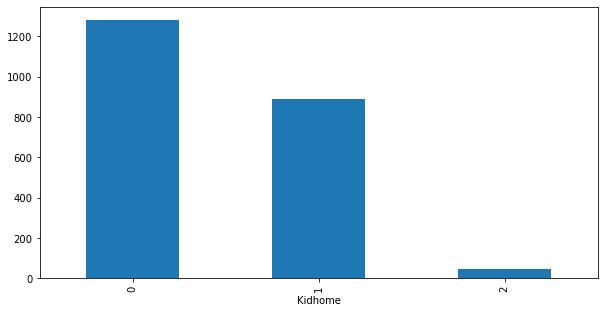

In [20]:
df_customer.groupby("Kidhome")['ID'].count().plot(kind = 'bar', figsize = (10,5))

## Teens at Home

<AxesSubplot:xlabel='Teenhome'>

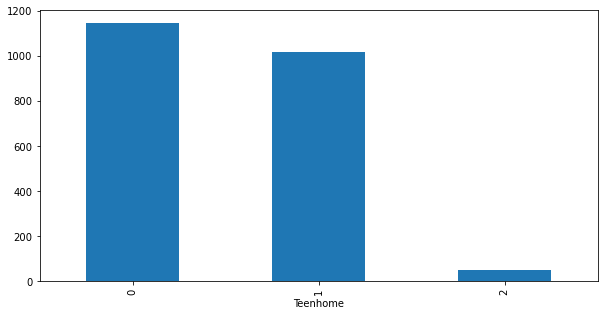

In [21]:
df_customer.groupby("Teenhome")['ID'].count().plot(kind = 'bar', figsize = (10,5))

## Date of Enrollment

<AxesSubplot:xlabel='Dt_Customer'>

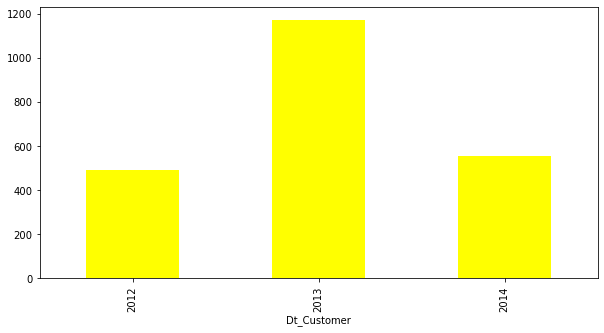

In [22]:
df_customer.groupby(pd.DatetimeIndex(df_customer.Dt_Customer).year)['ID'].count().plot(kind = 'bar', figsize = (10,5), color = 'yellow')


## Recency

/Users/oindrilasen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

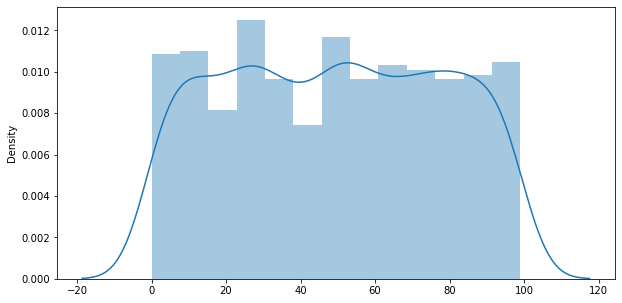

In [23]:
fig = plt.figure(figsize = (10,5))
sns.distplot(x= df_customer.Recency)

## Store or Web Purchase?

<AxesSubplot:>

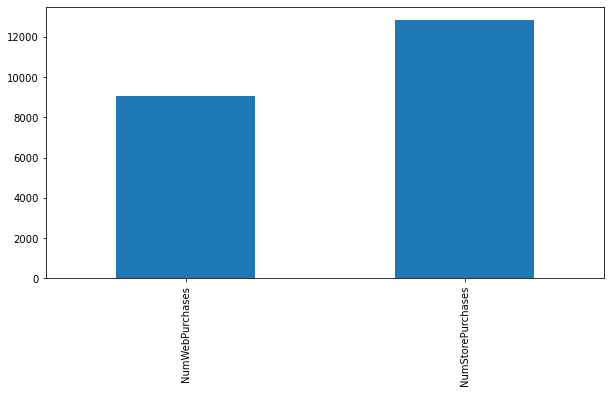

In [24]:
df_customer[['NumWebPurchases','NumStorePurchases']].sum().plot(kind = 'bar', figsize= (10,5))

## Shopping Trends

In [25]:
df = df_customer[['Kidhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
df

,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,635,88,546,172,88,88
1,1,11,1,6,2,1,6
2,0,426,49,127,111,21,42
3,1,11,4,20,10,3,5
4,1,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2211,0,709,43,182,42,118,247
2212,2,406,0,30,0,0,8
2213,0,908,48,217,32,12,24
2214,0,428,30,214,80,30,61


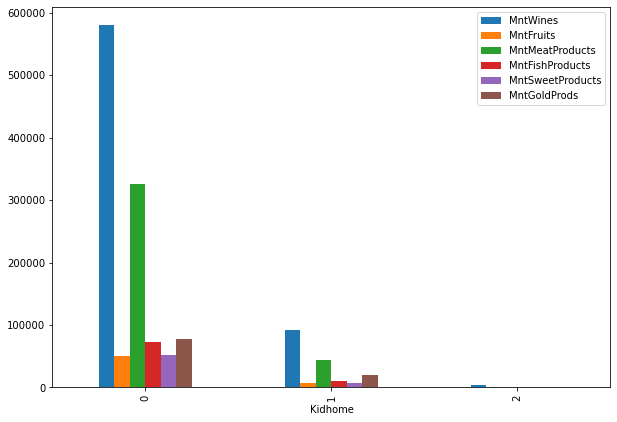

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
ax = df.groupby("Kidhome")[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().plot(kind = "bar",ax = ax)
plt.show()

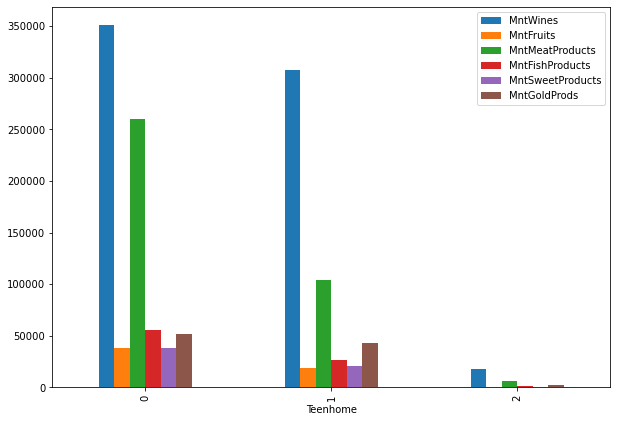

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
ax = df_customer.groupby("Teenhome")[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().plot(kind = "bar",ax = ax)
plt.show()

## Deals and Catalogs

In [28]:
df_customer[['ID','Year_Birth','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

,ID,Year_Birth,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,3,8,10,4,7
1,2174,1954,2,1,1,2,5
2,4141,1965,1,8,2,10,4
3,6182,1984,2,2,0,4,6
4,5324,1981,5,5,3,6,5
...,...,...,...,...,...,...,...
2211,10870,1967,2,9,3,4,5
2212,4001,1946,7,8,2,5,7
2213,7270,1981,1,2,3,13,6
2214,8235,1956,2,6,5,10,3


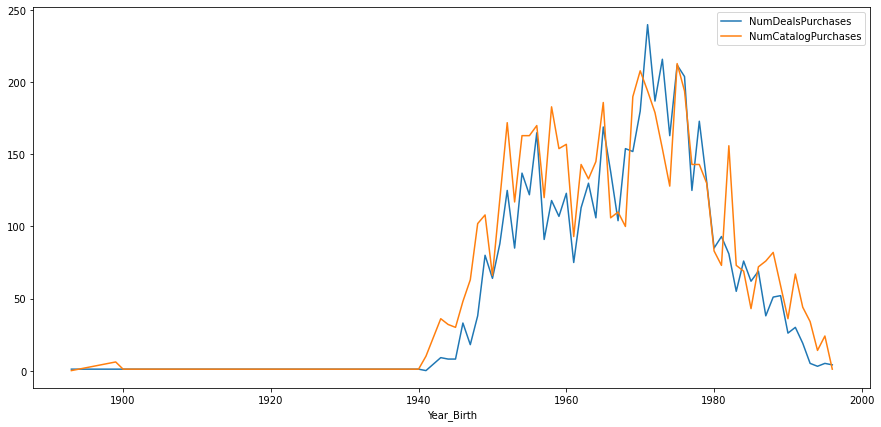

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
ax = df_customer.groupby("Year_Birth")[['NumDealsPurchases','NumCatalogPurchases']].sum().plot(ax = ax)
plt.show()

# -------- The End -----------

# Thank You!